# Bank Stocks Analysis Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to showcase EDA, it is not meant to be a robust financial analysis or be taken as financial advice.

## Get the Data

In this section we will use pandas-datareader to directly read data from Google finance using pandas!

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).

### The Imports
First we need to start with the proper imports.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Let's get the stock data from Jan 1st 2014 to Jan 1st 2024 for each of these banks. 
We'll then set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. 
This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to use datareader to grab info on the stock.

In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2024, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [4]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels:**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                          C           \
Stock Info    Open    High      Low  Close      Volume   Open     High   
Date                                                                     
2023-12-29   33.94  33.995  33.5500  33.67  28060739.0  51.56  51.6050   
2023-12-28   33.82  33.970  33.7700  33.88  21799559.0  51.40  51.7950   
2023-12-27   33.80  33.950  33.6600  33.84  24498581.0  51.14  51.5800   
2023-12-26   33.45  33.960  33.3715  33.86  24845437.0  50.88  51.5275   
2023-12-22   33.21  33.670  33.2000  33.43  37265860.0  50.73  51.2600   

Bank Ticker                             ...     MS                           \
Stock Info      Low  Close      Volume  ...   Open     High      Low  Close   
Date                                    ...                                   
2023-12-29   51.215  51.44  13149408.0  ...  93.49  93.7700  93.0600  93.25   
2023-12-28   51.400  51.52  10218453.0  ...  93.31  93.9501  93.2400  93.64   
2023-12-27   50.930  51.46   9901341.0  ...  92.69  93.6900  92.4004  93.66   
2023-12-26   50.790  51.34  11501461.0  ...  92.61  93.0200  92.3700  92.84   
2023-12-22   50.690  50.86  14440560.0  ...  92.90  93.6600  92.2324  92.41   

Bank Ticker               WFC                                    
Stock Info      Volume   Open    High    Low  Close      Volume  
Date                                                             
2023-12-29   4772283.0  49.35  49.575  49.21  49.22  11733578.0  
2023-12-28   4089529.0  49.14  49.650  49.09  49.48   9872634.0  
2023-12-27   4073222.0  49.41  49.565  49.15  49.33  12536734.0  
2023-12-26   2726286.0  49.16  49.670  49.03  49.64   8856695.0  
2023-12-22   5800929.0  49.66  49.860  49.09  49.18  10450410.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.2567
C       75.6568
GS     410.7930
JPM    170.3000
MS     105.7610
WFC     57.9642
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change(fill_method=None)
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,0.006237,0.001555,0.001659,0.001176,0.004182,0.005282
2023-12-27,-0.001181,-0.001165,-0.004995,-0.005285,0.000214,-0.003032
2023-12-26,0.000591,-0.002332,-0.007465,-0.005962,-0.008755,0.006284
2023-12-22,-0.012699,-0.009349,-0.002516,-0.005879,-0.004632,-0.009267


** Create a pairplot using seaborn of the returns dataframe. **

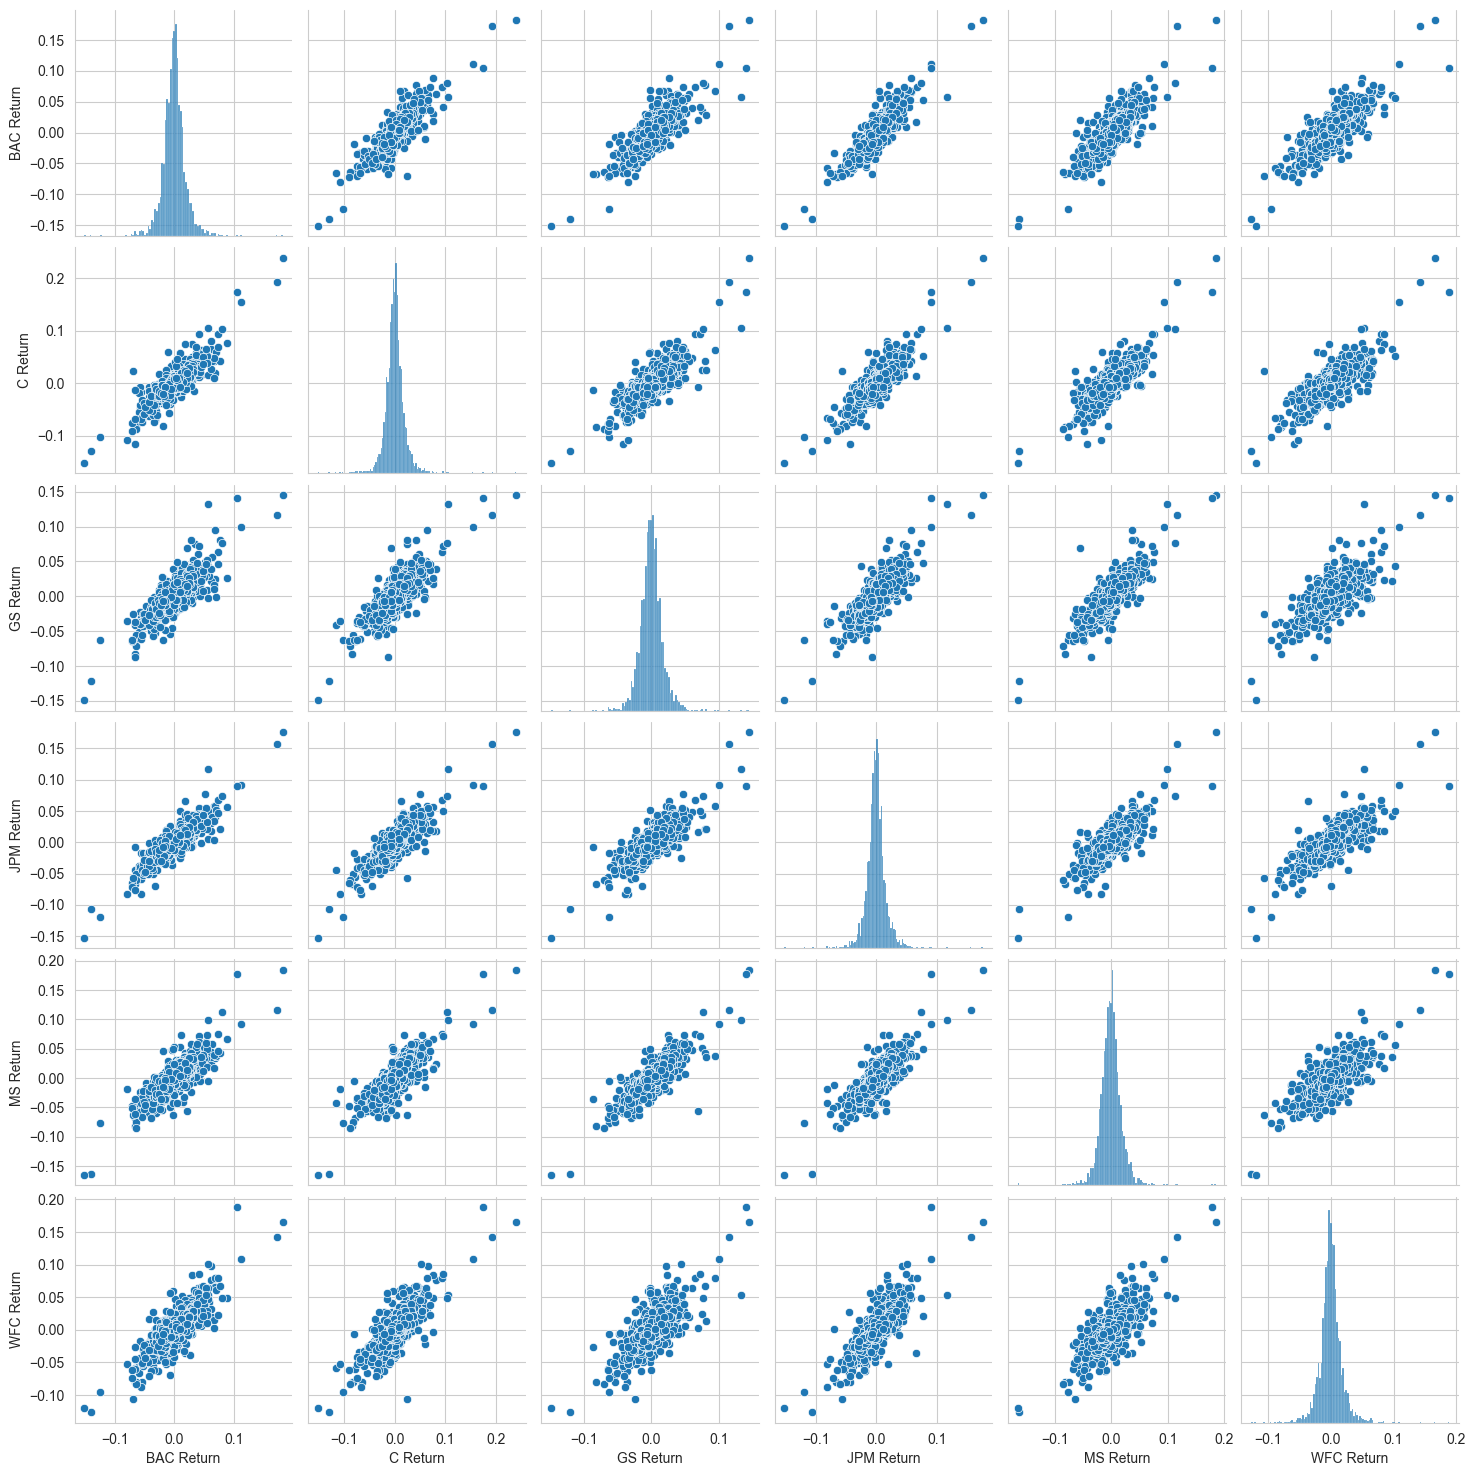

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

** Using this returns DataFrame, let's figure out on what dates each bank stock had the best and worst single day returns.**

In [13]:
# Worst Drop
returns.idxmin()

BAC Return   2020-03-12
C Return     2020-03-12
GS Return    2020-03-12
JPM Return   2020-03-12
MS Return    2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

** We notice that all 6 banks had the worst drop in March 2020, did anything significant happen that month? **

In [14]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

** We notice that all 6 banks had the best gain in March 2020 also, what happened that month? **

** Let's take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

In [15]:
risk = returns.std() 
risk

BAC Return    0.019558
C Return      0.020580
GS Return     0.017813
JPM Return    0.016972
MS Return     0.019503
WFC Return    0.019260
dtype: float64

In [16]:
risk.idxmax()

'C Return'

** Citigroup is the riskiest **

# Let's explore what happenned in 2023

In [17]:
sd = '2023-01-01'
ed = '2023-12-31' 
dates = pd.date_range(sd, ed)

In [18]:
risk_2023 = returns[returns.index.isin(dates)].std() 
risk_2023

BAC Return    0.016935
C Return      0.016087
GS Return     0.015301
JPM Return    0.013114
MS Return     0.016283
WFC Return    0.017561
dtype: float64

In [19]:
risk_2023.idxmin()

'JPM Return'

** Very similar risk profiles, JP Morgan Chase was the least risky in 2023 **

In [20]:
risk_2023.idxmax()

'WFC Return'

** Very similar risk profiles, Wells Fargo was the riskiest in 2023 **

** Let's create a displot using seaborn of the 2023 returns for JP Morgan Chase **

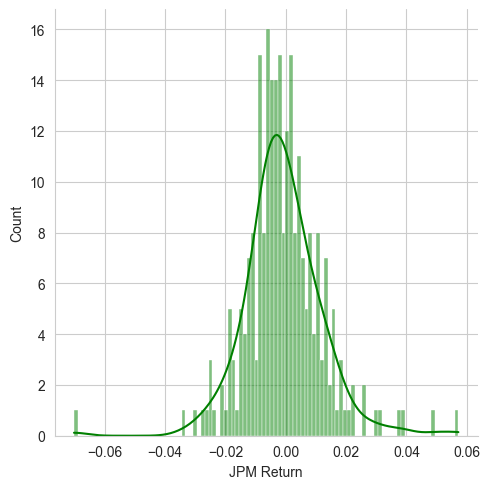

In [21]:
sns.displot(returns[returns.index.isin(dates)]['JPM Return'],color='green',bins=100, kde=True)

** Create a displot using seaborn of the 2023 returns for Wells Fargo **

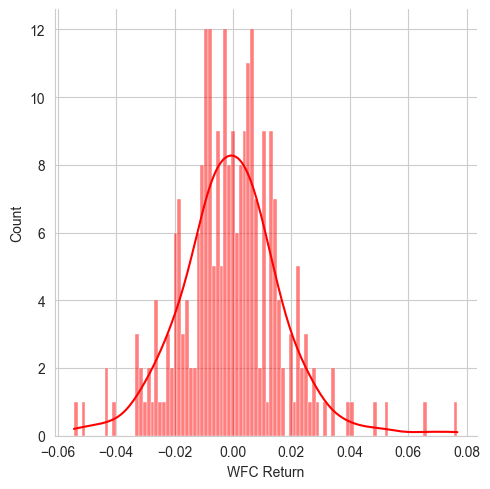

In [22]:
sns.displot(returns[returns.index.isin(dates)]['WFC Return'],color='red',bins=100, kde=True)

# More Visualization using plotly and cufflinks

In [23]:
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. **

<Axes: xlabel='Date'>

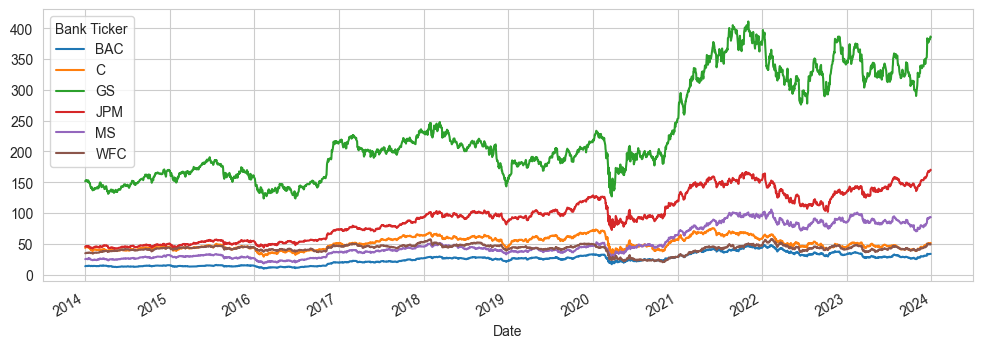

In [24]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4),label=tick)

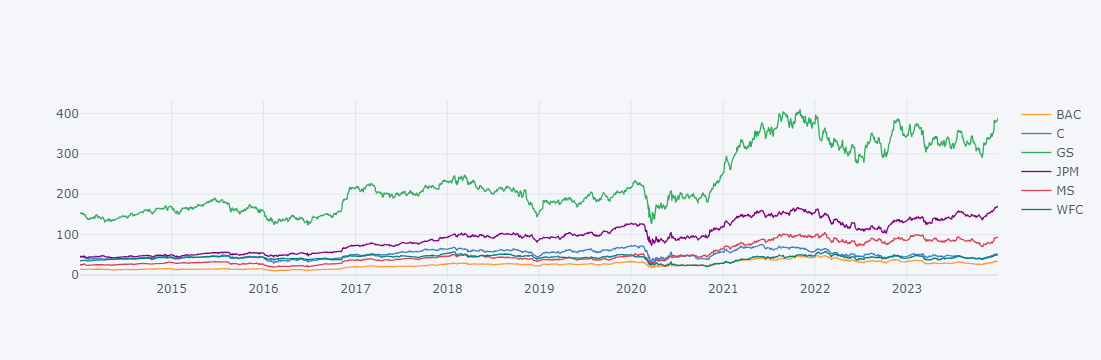

In [25]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2023. 

** Plot the rolling 30 day average against the Close Price for JP Morgan Chase's stock for the year 2023**

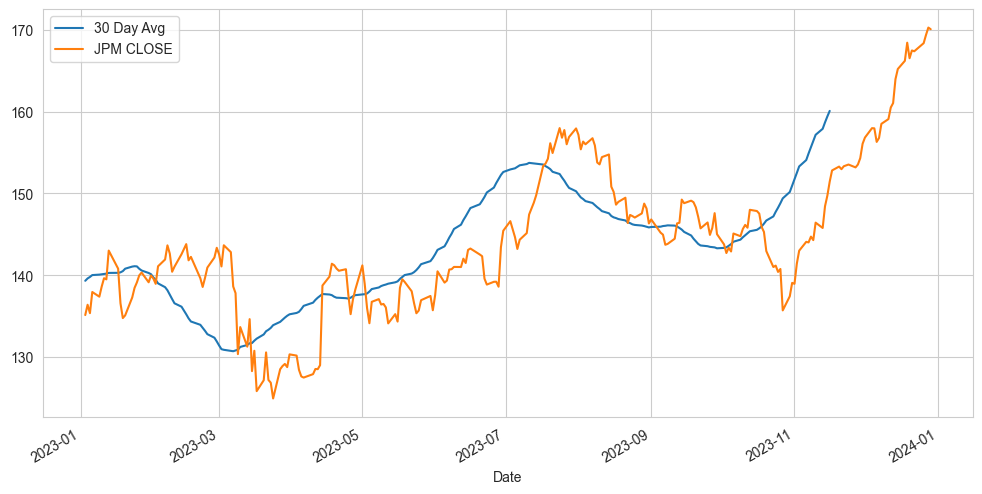

In [26]:
plt.figure(figsize=(12,6))
JPM[JPM.index.isin(dates)]['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
JPM[JPM.index.isin(dates)]['Close'].plot(label='JPM CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

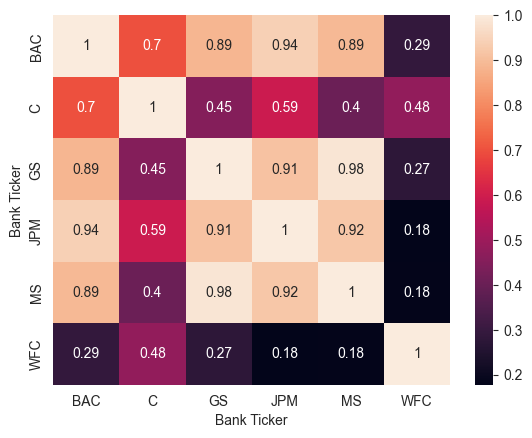

In [27]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Let's use seaborn's clustermap to cluster the correlations together:**

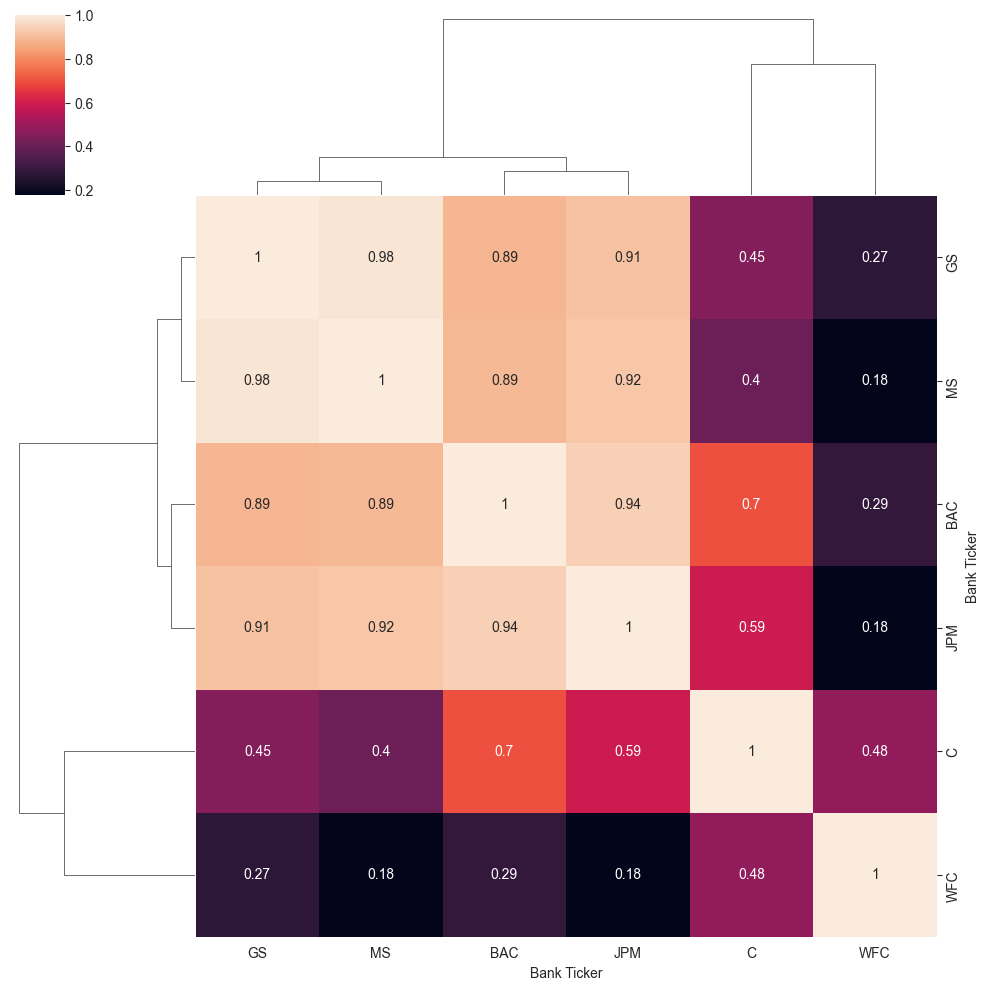

In [28]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

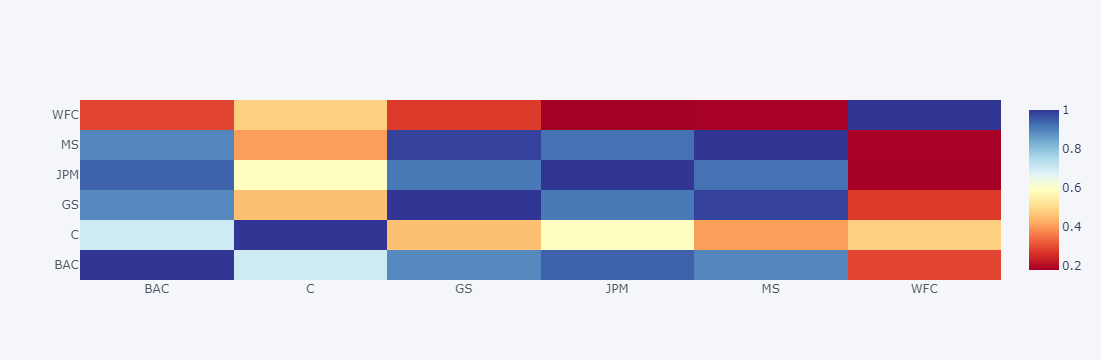

In [29]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

Let's use cufflinks library to create some Technical Analysis plots.

** Use .iplot(kind='candle) to create a candle plot of JP Morgan Chase's stock from Jan 1st 2023 to Jan 1st 2024.**

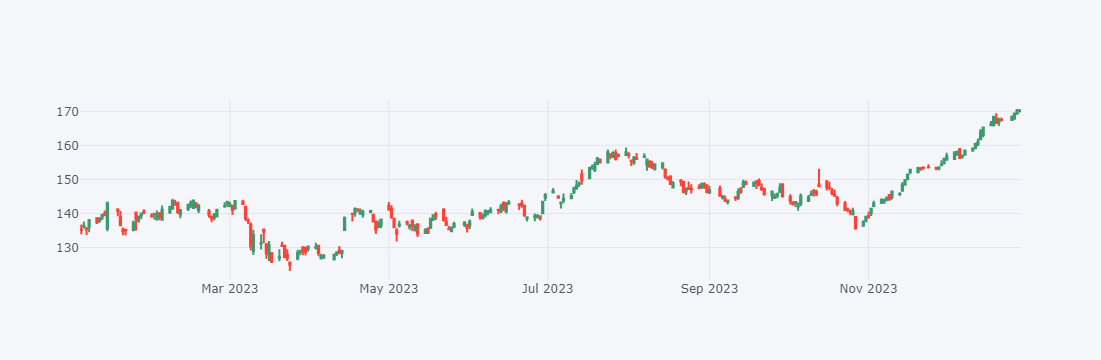

In [30]:
JPM[JPM.index.isin(dates)][['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of JP Morgan Chase for the year 2023.**

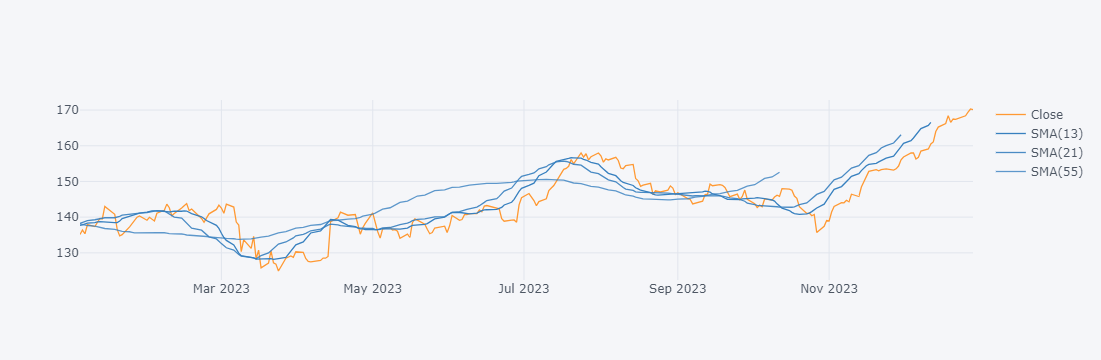

In [31]:
JPM[JPM.index.isin(dates)]['Close'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for JP Morgan Chase for the year 2023.**

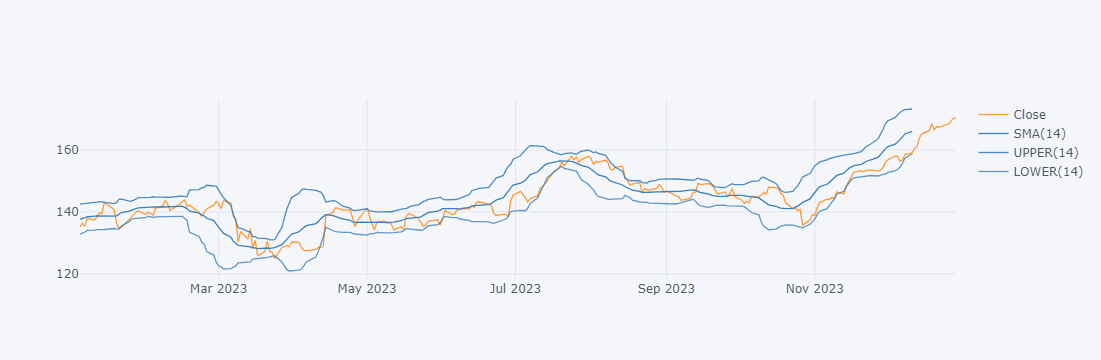

In [32]:
JPM[JPM.index.isin(dates)]['Close'].ta_plot(study='boll')

# Export the Notebook as HTML

In [33]:
from nbconvert import HTMLExporter
import nbformat
exporter = HTMLExporter()
notebook_path = 'Bank-Stocks-Notebook.ipynb'
notebook = nbformat.read(notebook_path, as_version=4)
html_output, resources = exporter.from_notebook_node(notebook)
output_file = 'Bank-Stocks-Notebook.html'
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(html_output)

# That's all for now!